# EDA

## Import Libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Pull Subreddit DF's

In [8]:
# import Data
df = pd.read_csv('../data/Subreddits_Data.csv', usecols = ['subreddit','selftext', 'title', 'corrected_title', 'char_count', 'word_count', 'neg', 'neu', 'pos', 'compound'])
df[['selftext', 'title', 'corrected_title']] = df[['selftext', 'title', 'corrected_title']].fillna('')


In [89]:
df.shape

(17065, 10)

In [9]:
# get data count
df['subreddit'].value_counts()

1    8540
0    8525
Name: subreddit, dtype: int64

In [10]:
# get baseline model
df['subreddit'].value_counts(normalize=True)

1    0.500439
0    0.499561
Name: subreddit, dtype: float64

In [15]:
# count Vectorize title data and remove stop words
stop_words  = stopwords.words('english')

count_vec_pipe = Pipeline(
                            [
                                ('vect', CountVectorizer(stop_words=stop_words, ngram_range=(1,1))),
                            ]
                        )
count_vec_pipe.fit(df['corrected_title'])
df_count_vec = pd.DataFrame(count_vec_pipe.transform(df['corrected_title']).A, columns=count_vec_pipe.get_feature_names_out())
master_df = pd.concat([df, df_count_vec], axis=1)
master_df = master_df.loc[:,~master_df.columns.duplicated()]


<AxesSubplot:>

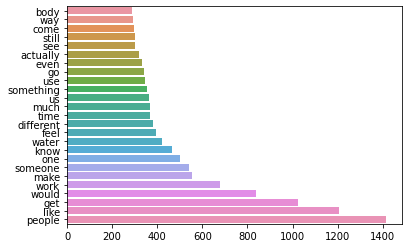

In [31]:
# Graph common words
common_words = df_count_vec.sum(numeric_only=True, axis=0).sort_values().tail(25)
sns.barplot(y=common_words.index, x=common_words.values)

In [64]:
# make wordcloud string
wordclud_text = df['corrected_title'].str.cat(sep=' ')


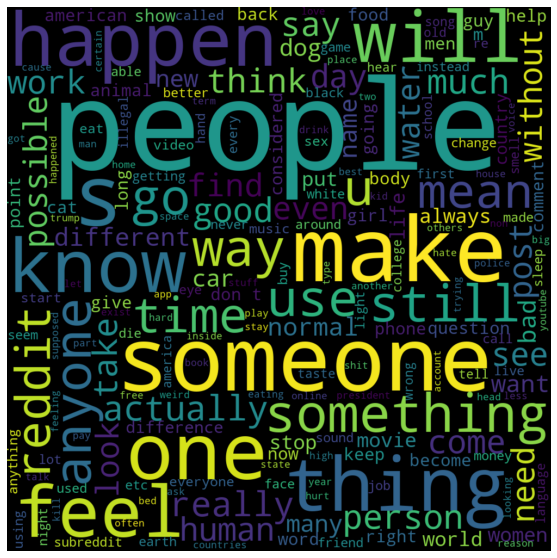

In [72]:
# make wordcloud visual for all words
wordcloud = WordCloud(width=1000, height=1000, margin=0, include_numbers=True).generate(wordclud_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("../img/word_cloud_all.png")
plt.show()


In [82]:
nsq_df = master_df[master_df['subreddit']==0] # NoStupidQuestions

In [80]:
nsq_df = nsq_df.drop(columns=['word_count', 'char_count', 'neu', 'neg', 'pos', 'compound'])

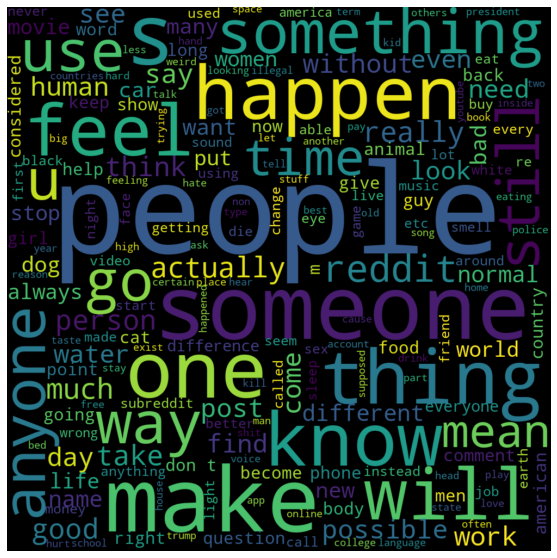

In [73]:
# make wordcloud visual for NoStupidQuestions 
wordclud_text = nsq_df['corrected_title'].str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000, margin=0, include_numbers=True).generate(wordclud_text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("../img/word_cloud_nsq.png")
plt.show()


In [83]:
nsq_df['word_count'].mean() # get the average wordcount no stupid questions

14.12058651026393

In [84]:
nsq_df['char_count'].mean() # get the average character count for no stupid questions

74.67237536656891

# fdsafa

In [86]:
elf_df = master_df[master_df['subreddit']==1] # explainlikeimfive

In [76]:
elf_df = elf_df.drop(columns=['word_count', 'char_count', 'neu', 'neg', 'pos', 'compound'])

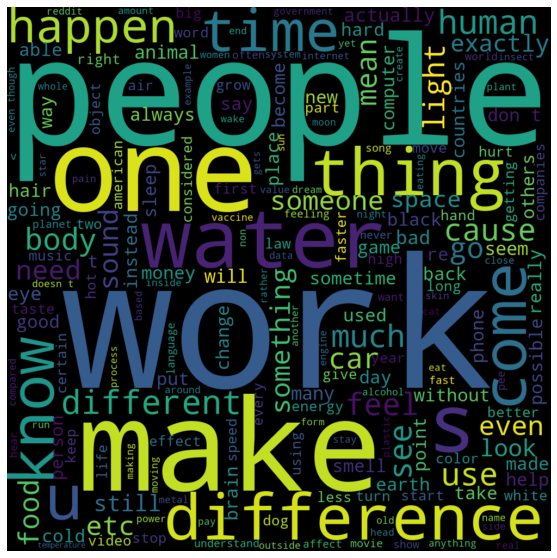

In [77]:
# make wordcloud visual for explainlikeimfive 
wordclud_text = elf_df['corrected_title'].str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000, margin=0, include_numbers=True).generate(wordclud_text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("../img/word_cloud_elf.png")
plt.show()


In [87]:
elf_df['word_count'].mean() # get the average wordcount explainlikeimfive

13.418852459016394

In [88]:
elf_df['char_count'].mean() # get the average character count for explainlikeimfive

73.46592505854801